In [125]:
import numpy as np
from sksfa import SFA, HSFA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Step 2: Representation

Goal: Check if the representation from the HSFA can be associated with the ground truth

In [101]:
# Load data
path = 'representation/ground_truth.npy'
ground_truth = np.load(path)
print(ground_truth.shape)

path = 'representation/representation.npy'
representation = np.load(path)
print(representation.shape)

(40000, 4)
(40000, 100)


In [107]:
def train_representation(X_train, X_test, y_train, y_test, n_features=100):
    """
    X_train: ndarray
        Data representation resulting from HSFA (used for trainig)
    X_test: ndarray 
        data representation resulting from HSFA (used for testing)
    y_train: ndarray
        Ground truth containing (marker hit will, x, y, phi)(used for training)
    y_test: ndarray
        Ground truth containing (marker hit will, x, y, phi)(used for testing)
    """

    X_train, X_test = X_train[:,:n_features], X_test[:, :n_features]

    # Train Model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Evaluate on Test set using MSE
    prediction = model.predict(X_test)
    
    #print(f'{n_features} \t', end='')
    results = []
    for i in range(prediction.shape[1]):
        #print(f'{mean_squared_error(y_test[:,i], prediction[:,i]):.4} \t', end='')
        results.append(mean_squared_error(y_test[:,i], prediction[:,i]))

    return results
    

In [108]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(representation, ground_truth, test_size=0.2)

# Try with different number of features
n_features = [10, 20, 30, 50, 60, 80, 100]

final_results = []
for n in n_features:
    results = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(representation, ground_truth, test_size=0.2)
        results.append(train_representation(X_train, X_test, y_train, y_test, n))
    final_results.append(results)

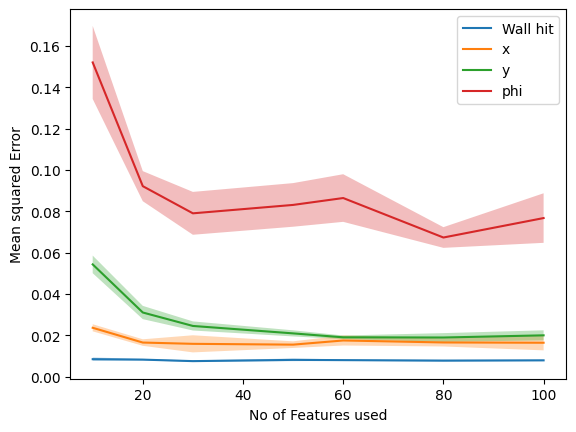

In [ ]:
# Plot results (all in one plot)
temp = np.array(final_results)
names = ["Wall hit", "x", "y", "phi"]
for i in range(4):
    points = np.average(temp[:,:,i], axis=1)
    std = np.std(temp[:,:,i], axis=1)
    plt.plot(n_features, points, label=names[i])
    plt.fill_between(n_features, points+std, points-std, alpha=0.3)

plt.xlabel("Number of Features used")
plt.ylabel("Mean squared Error")
plt.legend()

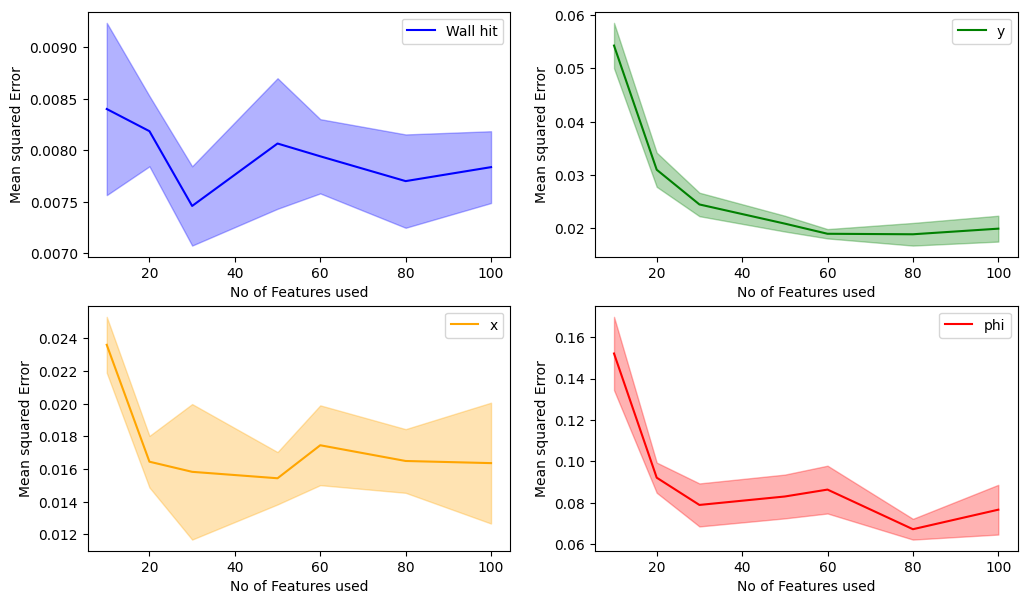

In [159]:
# Plot results (own plot for each feature)
names = ["Wall hit", "x", "y", "phi"]
colors = ["blue", "orange", "green", "red"]
fig, ax = plt.subplots(2,2, figsize=(12,7))

j = 0
for i in range(4):
    points = np.average(temp[:,:,i], axis=1)
    std = np.std(temp[:,:,i], axis=1)
    ax[i%2,j].plot(n_features, points, label=names[i], color=colors[i])
    ax[i%2,j].fill_between(n_features, points+std, points-std, alpha=0.3, color=colors[i])
    ax[i%2,j].set_xlabel("No of Features used")
    ax[i%2,j].set_ylabel("Mean squared Error")
    ax[i%2,j].legend()
    if i == 1: j=1


In [160]:
# Try with Half the training set
cut = int(representation.shape[0]/2)
X, y = representation[:cut], ground_truth[:cut]

# Try with different number of features
n_features = [10, 20, 30, 50, 60, 80, 100]

final_results = []
for n in n_features:
    results = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        results.append(train_representation(X_train, X_test, y_train, y_test, n))
    final_results.append(results)

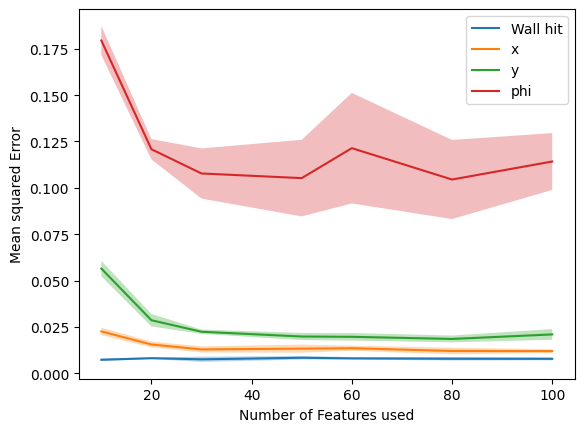

In [161]:
# Plot results (all in one plot)
temp = np.array(final_results)
names = ["Wall hit", "x", "y", "phi"]
for i in range(4):
    points = np.average(temp[:,:,i], axis=1)
    std = np.std(temp[:,:,i], axis=1)
    plt.plot(n_features, points, label=names[i])
    plt.fill_between(n_features, points+std, points-std, alpha=0.3)

plt.xlabel("Number of Features used")
plt.ylabel("Mean squared Error")
plt.legend()

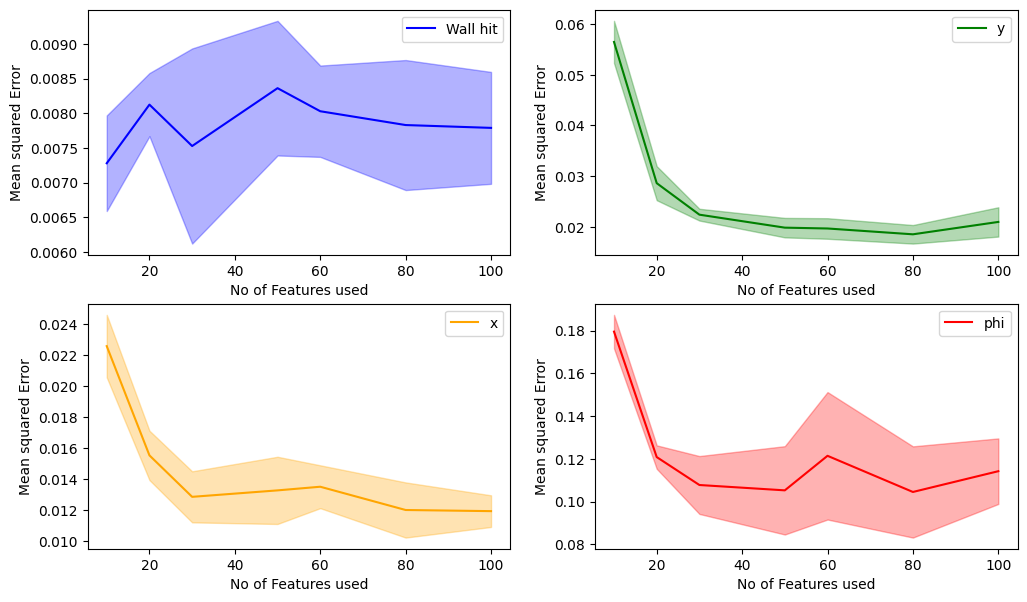

In [162]:
# Plot results (own plot for each feature)
names = ["Wall hit", "x", "y", "phi"]
colors = ["blue", "orange", "green", "red"]
fig, ax = plt.subplots(2,2, figsize=(12,7))

j = 0
for i in range(4):
    points = np.average(temp[:,:,i], axis=1)
    std = np.std(temp[:,:,i], axis=1)
    ax[i%2,j].plot(n_features, points, label=names[i], color=colors[i])
    ax[i%2,j].fill_between(n_features, points+std, points-std, alpha=0.3, color=colors[i])
    ax[i%2,j].set_xlabel("No of Features used")
    ax[i%2,j].set_ylabel("Mean squared Error")
    ax[i%2,j].legend()
    if i == 1: j=1